In [15]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [16]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]      # 컬럼0(꽃받침 길이)과 컬럼2(꽃잎 길이) 값을 가지고 옴
y = iris.target               # 정답값(꽃종류) 을 가지고 옴

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1, stratify=y)
# test_size : 전체 샘플에서 지정한 비율 만큼을 테스트 셋으로 분할함
# stratify : 각 분할 셋의 클래스 분포 비가 지정한 셋과 동일하도록 함 밑에 꺼 실행하면 알음

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = np.argmax(classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T),axis=1)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)): #[0,1] 처음 반복에서 idx=0 cl=0 그 다음에는 idx=1 cl=1
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    #print(idx)
    #print(cl)
    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

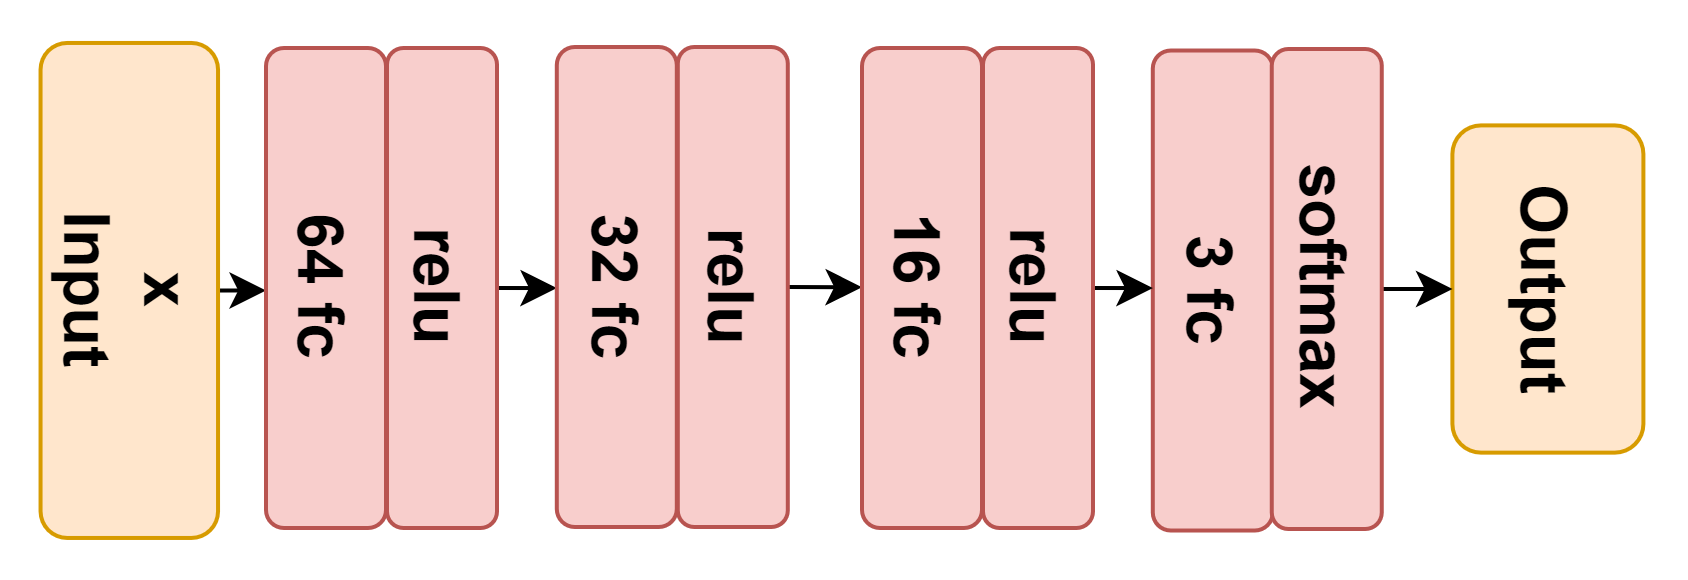

In [20]:
import matplotlib.pyplot as plt
'''model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])'''

input = tf.keras.layers.Input(shape=[2])
x1 = tf.keras.layers.Dense(64, activation='relu')(input)
x2 = tf.keras.layers.Dense(32, activation='relu')(x1)
x3 = tf.keras.layers.Dense(16, activation='relu')(x2)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x3)

model = tf.keras.Model(inputs=input, outputs=predictions)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  #categorical_crossentropy
              metrics=['accuracy'])
model.fit(X_train_std, y_train, epochs=100)



Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9820 - accuracy: 0.5067
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9321 - accuracy: 0.7333
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8863 - accuracy: 0.7467
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8513 - accuracy: 0.7467
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8144 - accuracy: 0.7733
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7828 - accuracy: 0.7733
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7484 - accuracy: 0.7733
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 0.7173 - accuracy: 0.7733
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6877 - accuracy: 0.7733
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.7733
Epoch 11/100
3/3 [===========

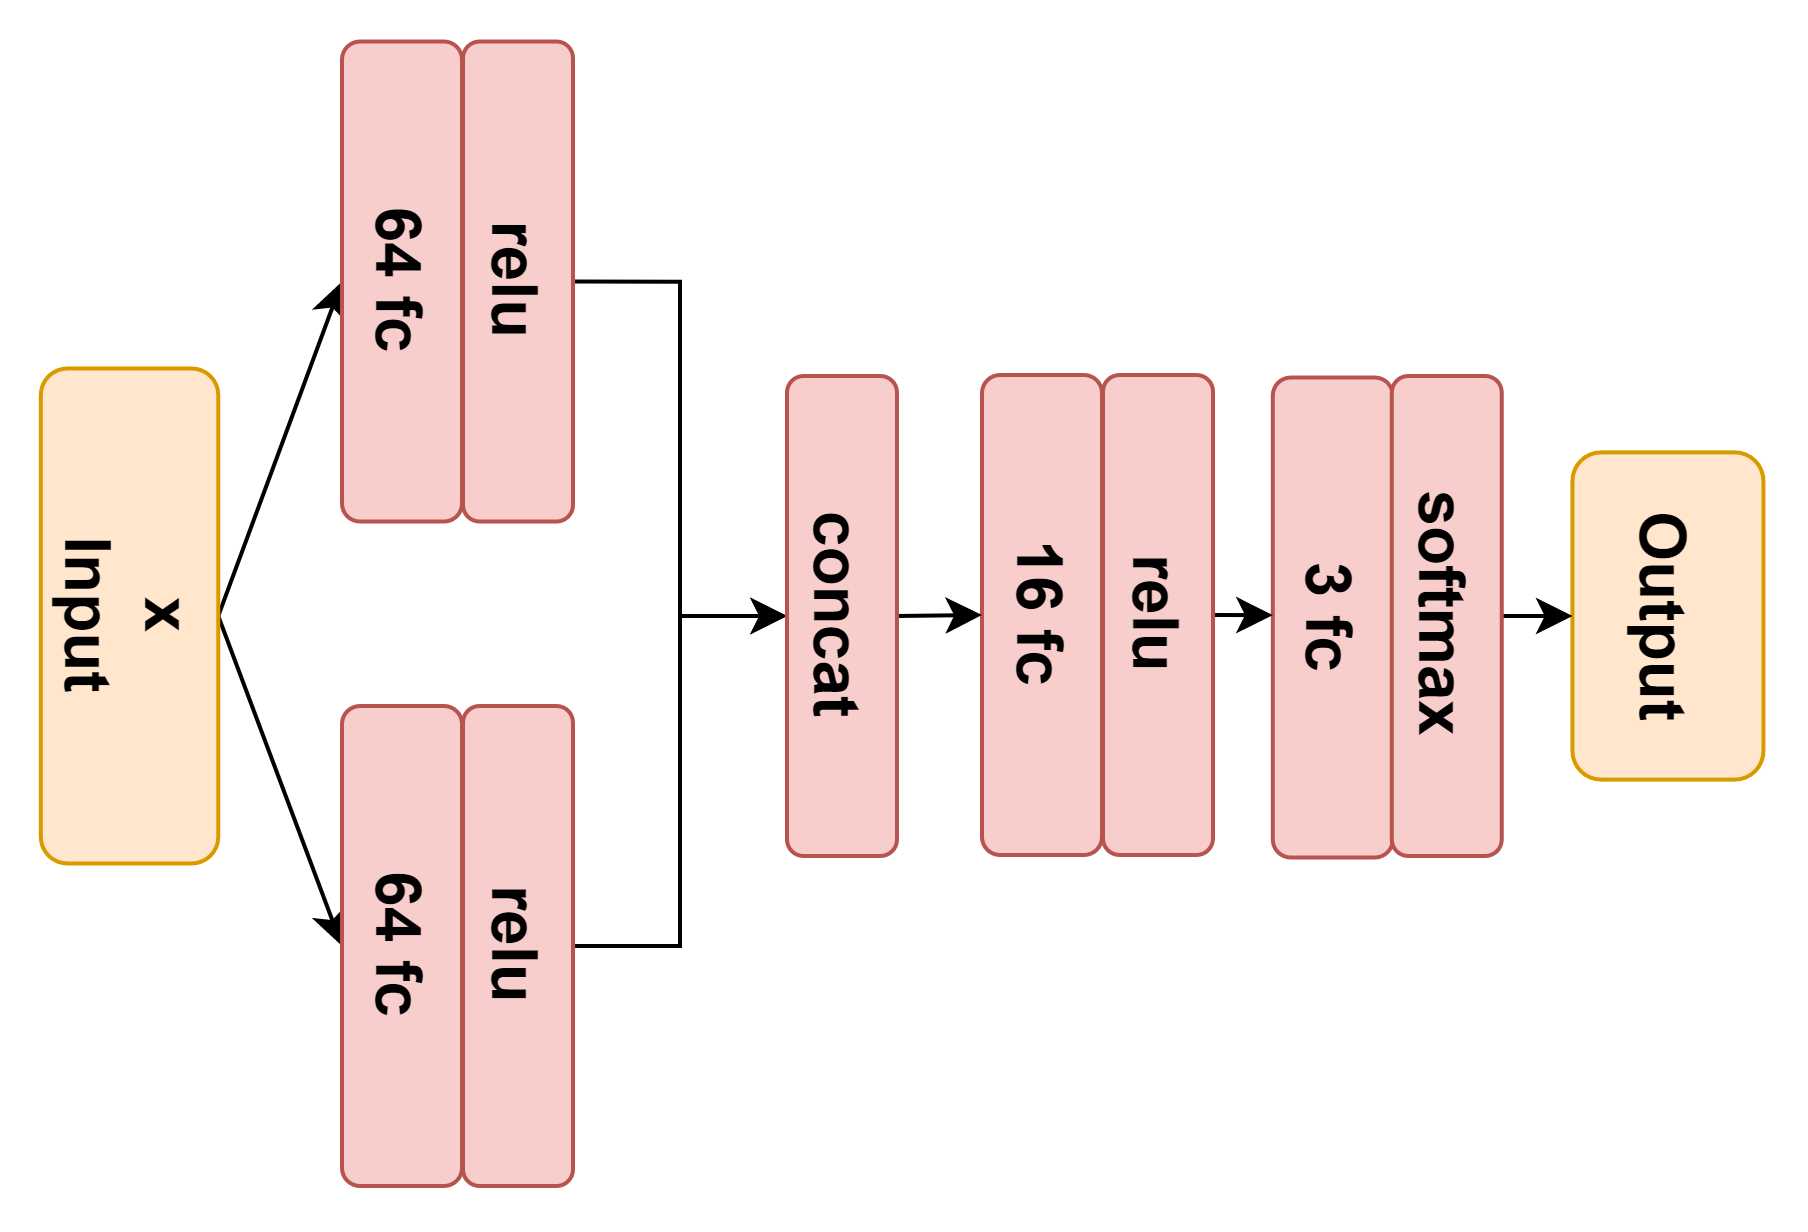

In [21]:
input = tf.keras.layers.Input(shape=[2])
x1 = tf.keras.layers.Dense(64, activation='relu')(input)
x2 = tf.keras.layers.Dense(64, activation='relu')(input)
data=tf.concat([x1,x2],axis=1)
x3 = tf.keras.layers.Dense(16, activation='relu')(data)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x3)

model = tf.keras.Model(inputs=input, outputs=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  #categorical_crossentropy
              metrics=['accuracy'])
model.fit(X_train_std, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1255 - accuracy: 0.2400
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0238 - accuracy: 0.4667
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9353 - accuracy: 0.6800
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8644 - accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8070 - accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7606 - accuracy: 0.6667
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7246 - accuracy: 0.6667
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.6667
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6723 - accuracy: 0.6667
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6667
Epoch 11/100
3/3 [===========

2519/2519 [==============================] - 4s 2ms/step


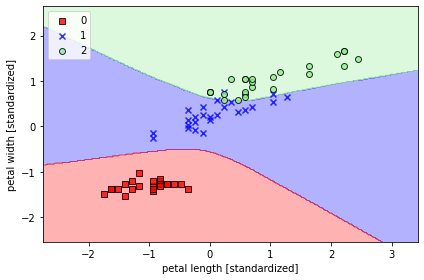

In [22]:
plot_decision_regions(X_train_std, y_train,
                      classifier=model)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
out=model.predict(X_test_std)
out=np.argmax(out,axis=1)

r=np.random.randint(0,20)

print(out[r])
print(y_test[r])

3/3 [==============================] - 0s 4ms/step
1
1
